# **Data Journalism** - Navigating Future Opportunities: An Insightful Exploration of Canadian Employment Wages and Trends

In an era where industry landscapes are rapidly evolving, understanding the dynamics of occupational trends and wages becomes pivotal for aspiring professionals and students aiming to position themselves advantageously in the job market. "Navigating Future Opportunities" delves deep into the fabric of Canada's employment sectors, employing a comprehensive exploratory data analysis (EDA) of recent wage statistics to unravel the nuances of various occupations and industries.

> 1) **Exploratory Data Analysis** <br>
> 2) **Generative AI**<br>

This project is structured into two main parts: an in-depth EDA segment, which leverages data visualization to highlight key trends, disparities, and insights within Canadian employment wages across different sectors, and a generative AI segment, aimed at interpreting these findings through the lens of data journalism. The primary objective of our analysis is to offer a granular look at which industries and occupations hold the promise of prosperity, growth, and stability. By identifying sectors that are leading in wage trends and those that lag, we aim to provide a roadmap for individuals to make informed decisions about their careers and educational paths, ultimately getting ahead in the game.

## **Pre-requisite Actions**

In [5]:
# Import necessary packages
!pip install openai --quiet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai import OpenAI
import os

# added this pkg to implement the sniffer:
import csv
# added to play around and test the generalized approach for uploads:
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


## **Download the Dataset:**

 >* **Folder Access**: [Click to download the Employee Wages Data](https://drive.google.com/drive/folders/19z4KBZxFu6g4Hgmw9jkYU-WBBHzxFrnh?usp=sharing) <br>
 Sourced from: [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410041701&pickMembers%5B0%5D=1.1&pickMembers%5B1%5D=2.1&pickMembers%5B2%5D=3.1&pickMembers%5B3%5D=5.1&pickMembers%5B4%5D=6.1&cubeTimeFrame.startYear=2018&cubeTimeFrame.endYear=2023&referencePeriods=20180101%2C20230101)

## **Get to know the Data**




In [15]:
# Check data types, row/column headers
# Check the csv delimeter types (\t or ; or ,) to specify the separation between data
# Pick the correct csv file for each task where relevant

# reference url: https://docs.python.org/3/library/csv.html
# csv delimeter function to reuse:
def sniff_csv_delimiter(csv_file):
    with open(csv_file, newline='') as csv_file_to_sniff:
        try:
            dialect = csv.Sniffer().sniff(csv_file_to_sniff.read(1024))
            csv_file_to_sniff.seek(0)  # Return to the start of the file after reading
            return dialect.delimiter
        except csv.Error:
            print("Could not determine the delimiter. Please inspect the file manually.")

In [6]:
# upload a dataset to test the function (you can choose multiple files):
from google.colab import files
uploaded = files.upload()

# create a dictionary for the delimeters:
file_and_delimeter_dict = {}

# loop through the files uploaded, sniff it, and update the dictionary:
for file_name, data in uploaded.items():
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            first_line = f.readline()
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(first_line)
            file_and_delimeter_dict[file_name] = dialect.delimiter

            print(f"Detected delimiter for '{file_name}': {dialect.delimiter}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# caveat: the delimeter '\t' is literally a tab! The sniffer display a tab space,
# therefore, you will not see '\t' in the dict

Saving Average_Hourly_Wages_Female_Canadian.csv to Average_Hourly_Wages_Female_Canadian.csv
Saving Average_Hourly_Wages_Male_Canadian.csv to Average_Hourly_Wages_Male_Canadian.csv
Saving Average_Hourly_Wages_Overall_Canadian.csv to Average_Hourly_Wages_Overall_Canadian.csv
Saving Average_Weekly_Wages_Full-time_Canadian.csv to Average_Weekly_Wages_Full-time_Canadian.csv
Saving Average_Weekly_Wages_Part-time_Canadian.csv to Average_Weekly_Wages_Part-time_Canadian.csv
Saving Total_Employee_Wages_Canadian.csv to Total_Employee_Wages_Canadian.csv
Detected delimiter for 'Average_Hourly_Wages_Female_Canadian.csv': ,
Detected delimiter for 'Average_Hourly_Wages_Male_Canadian.csv': ,
Detected delimiter for 'Average_Hourly_Wages_Overall_Canadian.csv': 	
Detected delimiter for 'Average_Weekly_Wages_Full-time_Canadian.csv': ,
Detected delimiter for 'Average_Weekly_Wages_Part-time_Canadian.csv': ,
Detected delimiter for 'Total_Employee_Wages_Canadian.csv': ,


In [7]:
# choosing one of the files randomnly:
selected_random_file = random.choice(list(file_and_delimeter_dict))
delimeter_random_file = file_and_delimeter_dict[selected_random_file]

print(f"File {selected_random_file} and delimeter {delimeter_random_file}")

df_random_file = pd.read_csv(selected_random_file, sep=delimeter_random_file)

# displaying info() because I can see the types, the column names and etc:
df_random_file.info()

File Total_Employee_Wages_Canadian.csv and delimeter ,
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    354 non-null    int64  
 1   GEO                                         354 non-null    object 
 2   DGUID                                       354 non-null    object 
 3   Wages                                       354 non-null    object 
 4   Type of work                                354 non-null    object 
 5   National Occupational Classification (NOC)  354 non-null    object 
 6   Sex                                         354 non-null    object 
 7   Age group                                   354 non-null    object 
 8   UOM                                         354 non-null    object 
 9   UOM_ID                          

In [8]:
# very statistical informative function:
df_random_file.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
count,354.000000,354.0,354.0,354.000000,0.0,0.0,0.0,354.0
mean,2020.500000,249.0,0.0,899.046893,NaN,NaN,NaN,1.0
std,1.710242,0.0,0.0,2163.940716,NaN,NaN,NaN,0.0
min,2018.000000,249.0,0.0,36.300000,NaN,NaN,NaN,1.0
25%,2019.000000,249.0,0.0,168.375000,NaN,NaN,NaN,1.0
50%,2020.500000,249.0,0.0,423.800000,NaN,NaN,NaN,1.0
75%,2022.000000,249.0,0.0,790.200000,NaN,NaN,NaN,1.0
max,2023.000000,249.0,0.0,17518.400000,NaN,NaN,NaN,1.0


# **Exploratory Data Analysis**


### **The Recent Evolution of Wages: A Historical Perspective**

In [9]:
# Task: Create a line plot that shows the overall hourly wage trend over time
# # Pick the correct dataset from the folder

# I'll admit that you will upload the file for the first time into your workspace
# then I don't need to be concerned with Average_Hourly_Wages_Overall_Canadian.csv (#x).csv
file_to_find = 'Average_Hourly_Wages_Overall_Canadian.csv'
if file_to_find in file_and_delimeter_dict:
    print(f"File '{file_to_find}' found with delimiter: {file_and_delimeter_dict[file_to_find]}")
else:
    print(f"File '{file_to_find}' not found in the uploaded files.")

df = pd.read_csv(file_to_find, sep=file_and_delimeter_dict[file_to_find])
df.info()

File 'Average_Hourly_Wages_Overall_Canadian.csv' found with delimiter: 	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    708 non-null    int64  
 1   GEO                                         708 non-null    object 
 2   DGUID                                       708 non-null    object 
 3   Wages                                       708 non-null    object 
 4   Type of work                                708 non-null    object 
 5   National Occupational Classification (NOC)  708 non-null    object 
 6   Sex                                         708 non-null    object 
 7   Age group                                   708 non-null    object 
 8   UOM                                         708 non-null    object 
 9   UOM_ID        

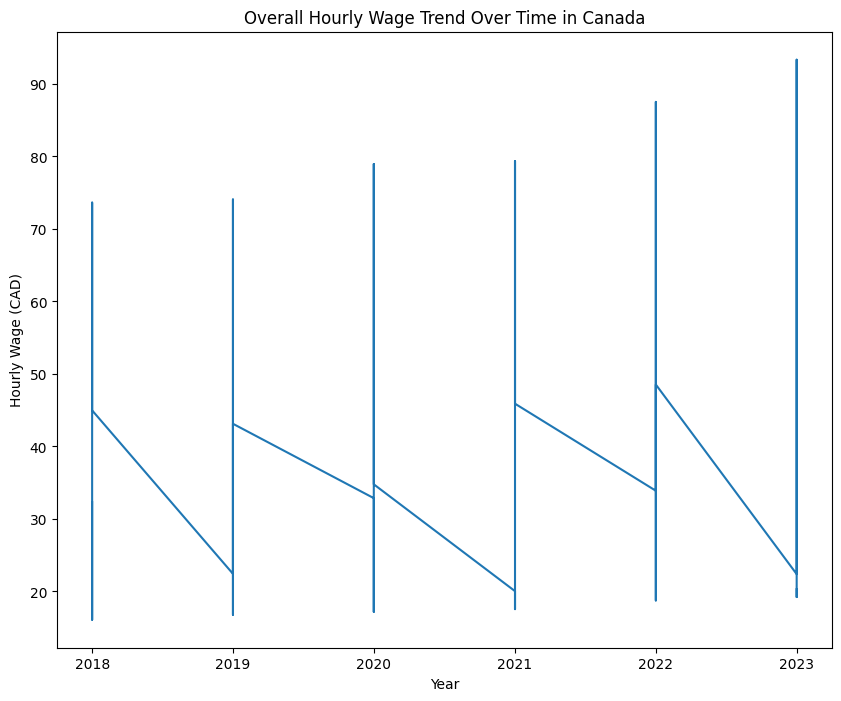

In [10]:
# for this first task, it appears that I need to focus on the REF_DATE and VALUES
# printing them displayed me a time reference and the value appears to be the hourly wage

# pre-processing the data to gt a better label: (and the dates are not ordered)
df_sorted_by_dates = df.sort_values(by='REF_DATE')

dates = df['REF_DATE'] = pd.to_datetime(df_sorted_by_dates['REF_DATE'], format='%Y')
values = df_sorted_by_dates['VALUE']

# preparing to plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Overall Hourly Wage Trend Over Time in Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Hourly Wage (CAD)')
ax.plot(dates, values)

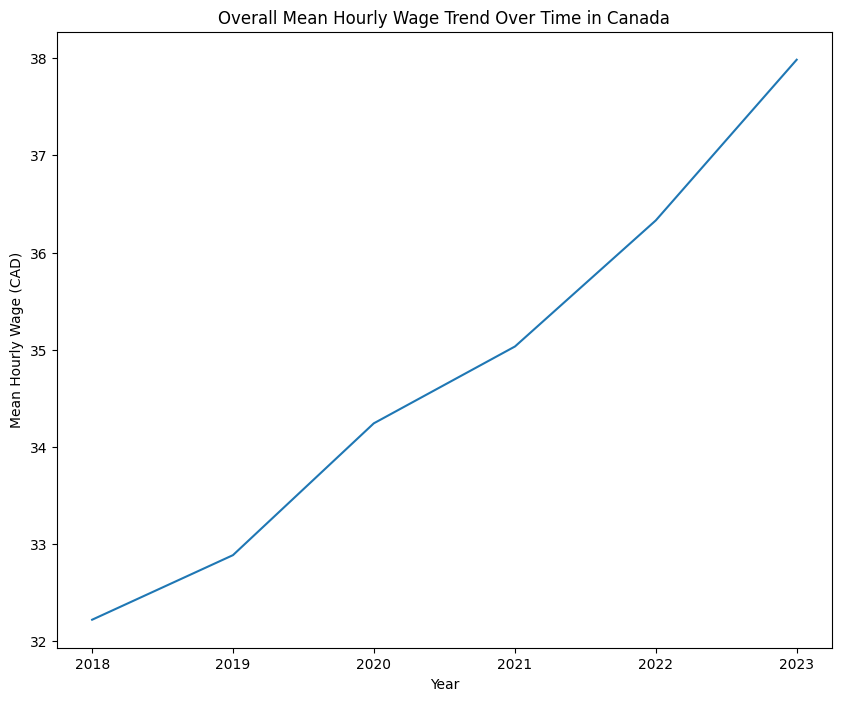

In [11]:
# this graphic is HORRIBLE! I believe it's because I have several entries for the
# same period of time. With that in mind I decided to take the mean per period.
mean_values_grouped_by_dates = df_sorted_by_dates.groupby('REF_DATE')['VALUE'].mean().reset_index()
mean_values_grouped_by_dates['REF_DATE'] = pd.to_datetime(df_sorted_by_dates['REF_DATE'], format='%Y')

# preparing to plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Overall Mean Hourly Wage Trend Over Time in Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Hourly Wage (CAD)')
ax.plot(mean_values_grouped_by_dates['REF_DATE'], mean_values_grouped_by_dates['VALUE'])

### **Job and Financial Security: Choosing Between Casual and Permanent Employment**

In [12]:
x_axis_overall = mean_values_grouped_by_dates['REF_DATE']
y_axis_overall = mean_values_grouped_by_dates['VALUE']

# Compare the overall hourly wage trend (total employees) against health and engineering professionals
# Filter the DataFrame for the selected occupations
selected_occupations = df[df['National Occupational Classification (NOC)'].isin([
    'Professional occupations in engineering [213]',
    'Professional occupations in health [31]',
    'Total employees, all occupations [00-95]'
])]

# I need to group by REF_DATE and NOC, then calculate the mean:
occupation_grouped = selected_occupations.groupby(['REF_DATE', 'National Occupational Classification (NOC)'])['VALUE'].mean().reset_index()

# I need to pivot the data to have REF_DATE as index and each occupation as a column
occupation_pivoted = occupation_grouped.pivot(index='REF_DATE', columns='National Occupational Classification (NOC)', values='VALUE').reset_index()
occupation_pivoted.head()

National Occupational Classification (NOC),REF_DATE,Professional occupations in engineering [213],Professional occupations in health [31],"Total employees, all occupations [00-95]"
0,2018-01-01,44.185,39.680,30.315
1,2019-01-01,44.090,40.755,31.145
2,2020-01-01,45.025,41.995,32.895
3,2021-01-01,44.830,42.380,33.735
4,2022-01-01,47.900,43.370,35.200


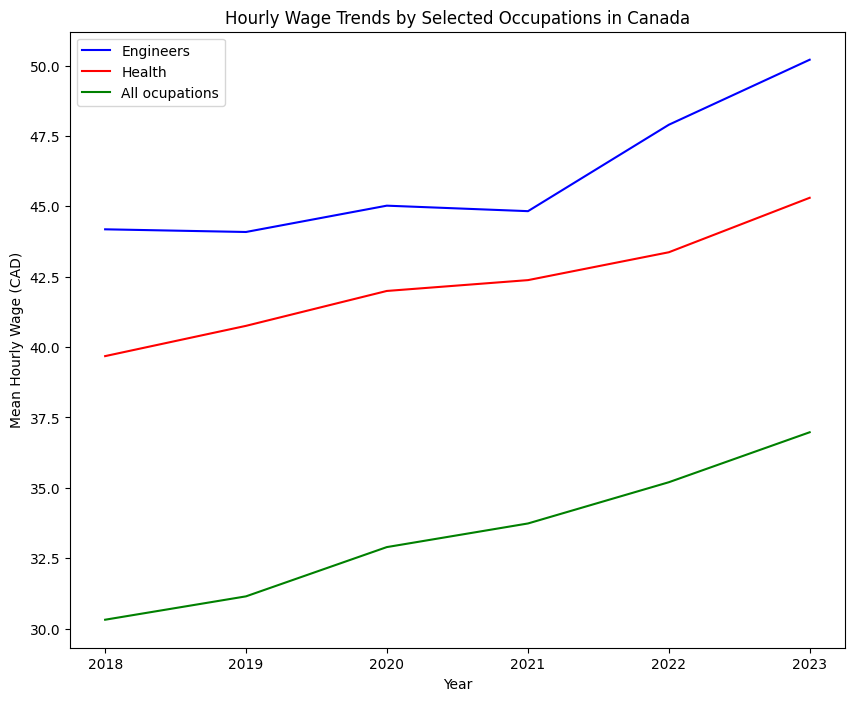

In [19]:
# Convert REF_DATE to datetime format for proper plotting
occupation_pivoted['REF_DATE'] = pd.to_datetime(occupation_pivoted['REF_DATE'], format='%Y')

engineers = occupation_pivoted['Professional occupations in engineering [213]']
health_care = occupation_pivoted['Professional occupations in health [31]']
total_employees_all_ocupations = occupation_pivoted['Total employees, all occupations [00-95]']

# preparing to plot:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Hourly Wage Trends by Selected Occupations in Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Hourly Wage (CAD)')

ax.plot(occupation_pivoted['REF_DATE'], engineers, color="blue")
ax.plot(occupation_pivoted['REF_DATE'], health_care, color="red")
ax.plot(occupation_pivoted['REF_DATE'], total_employees_all_ocupations, color="green")
ax.legend([
  'Engineers',
  'Health',
  'All ocupations'
])

In [26]:
# Compare the average weekly wage between full-time and part-time employees. Use a bar chart to for visualization
# Hint: You may need to filter the dataframe based on the 'Type of work' column and then use groupby and mean to calculate the average wages.
# Calculation method: Find the average between all the available years in the dataset for both type of work
file_full_time = 'Average_Weekly_Wages_Full-time_Canadian.csv'
df_full_time = pd.read_csv(file_full_time, sep=file_and_delimeter_dict[file_full_time])
df_full_time.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,354.000000,354.0,354.0,351.000000,0.0,0.0,354.0
mean,2020.500000,75.0,0.0,527.446980,NaN,NaN,2.0
std,1.710242,0.0,0.0,224.974609,NaN,NaN,0.0
min,2018.000000,75.0,0.0,204.870000,NaN,NaN,2.0
25%,2019.000000,75.0,0.0,340.030000,NaN,NaN,2.0
50%,2020.500000,75.0,0.0,472.490000,NaN,NaN,2.0
75%,2022.000000,75.0,0.0,658.190000,NaN,NaN,2.0
max,2023.000000,75.0,0.0,1475.730000,NaN,NaN,2.0


In [29]:
file_part_time = 'Average_Weekly_Wages_Part-time_Canadian.csv'
df_part_time = pd.read_csv(file_part_time, sep=file_and_delimeter_dict[file_part_time])
df_part_time.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,354.000000,354.0,354.0,351.000000,0.0,0.0,354.0
mean,2020.500000,75.0,0.0,527.446980,NaN,NaN,2.0
std,1.710242,0.0,0.0,224.974609,NaN,NaN,0.0
min,2018.000000,75.0,0.0,204.870000,NaN,NaN,2.0
25%,2019.000000,75.0,0.0,340.030000,NaN,NaN,2.0
50%,2020.500000,75.0,0.0,472.490000,NaN,NaN,2.0
75%,2022.000000,75.0,0.0,658.190000,NaN,NaN,2.0
max,2023.000000,75.0,0.0,1475.730000,NaN,NaN,2.0


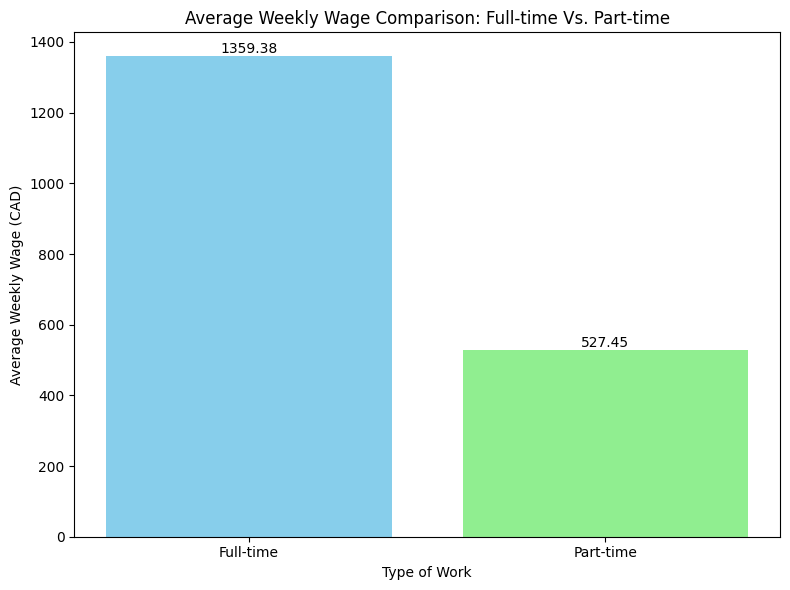

In [31]:
# Visualize your findings and identify if it is better to be a casual or permanent employee
# (For the text analysis in the Generational AI section)

# calculate the mean weekly wage for full-time and part-time employees
full_time_mean_wage = df_full_time['VALUE'].mean()
part_time_mean_wage = df_part_time['VALUE'].mean()

# create a DataFrame for the plotting data
wage_data = {
    'Type of Work': ['Full-time', 'Part-time'],
    'Average Weekly Wage': [full_time_mean_wage, part_time_mean_wage]
}
df_wage_comparison = pd.DataFrame(wage_data)

# now let's create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# creating bar chart
ax.bar(df_wage_comparison['Type of Work'], df_wage_comparison['Average Weekly Wage'], color=['skyblue', 'lightgreen'])

# setting the title and labels
ax.set_title('Average Weekly Wage Comparison: Full-time Vs. Part-time')
ax.set_xlabel('Type of Work')
ax.set_ylabel('Average Weekly Wage (CAD)')

# annotating the bar chart with the data values
for i, value in enumerate(df_wage_comparison['Average Weekly Wage']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [33]:
# The bar chart clearly display that full-time employees earn significantly more on average per week than part-time employees.
# The difference is more than double, which is a substantial gap in earnings between these.

###**Wage Disparity: A Comparison by Occupation and Gender"**

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Legislative and senior management occupations [00]'),
  Text(0, 1.5, 'Management occupations [00, 10, 20, 30, 40, 50, 60, 70, 80, 90]'),
  Text(0, 2.5, 'Middle management occupations in trades, transportation, production and utilities [70, 80, 90]'),
  Text(0, 3.5, 'Professional occupations in law [411]'),
  Text(0, 4.5, 'Specialized middle management occupations [10, 20, 30, 40, 50]')])

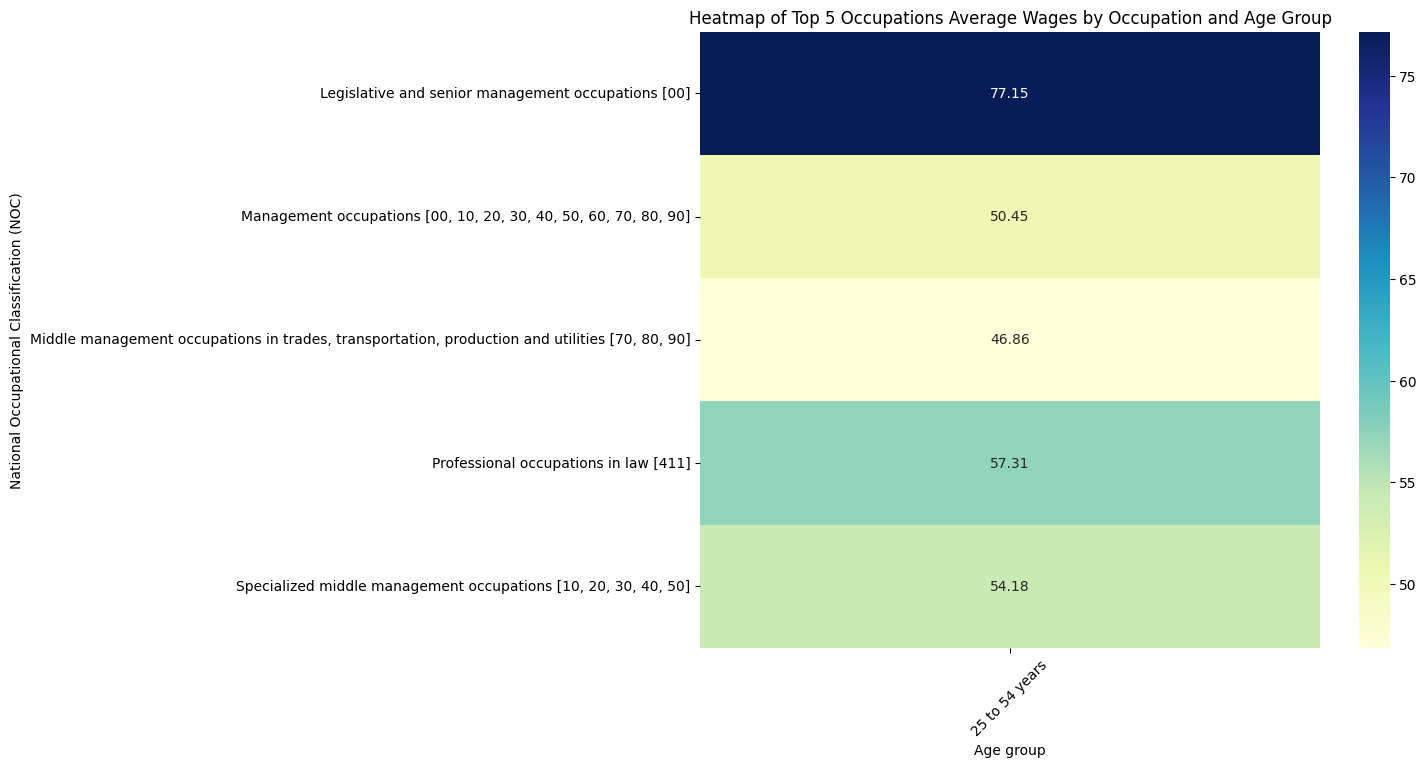

In [38]:
# Identify the top 5 occupations with the highest average wage
# Plot a heatmap of those top 5 occupations average wages by occupation and age group to visualize the distribution across these dimensions.
# Hint: Group the data by 'National Occupational Classification (NOC)' and calculate the mean wage. Then sort the results and use head() to get the top 5 occupations.
file_males_wage = 'Average_Hourly_Wages_Male_Canadian.csv'
df_males_wage = pd.read_csv(file_males_wage, sep=file_and_delimeter_dict[file_males_wage])

file_females_wage = 'Average_Hourly_Wages_Female_Canadian.csv'
df_females_wage = pd.read_csv(file_females_wage, sep=file_and_delimeter_dict[file_females_wage])

# combine the male and female wages data:
combined_df = pd.concat([df_males_wage, df_females_wage])

# group by 'NOC' and calculate the mean wage:
grouped_by_noc = combined_df.groupby('National Occupational Classification (NOC)')['VALUE'].mean()

# sort and find the top 5 occupations:
top_5_occupations = grouped_by_noc.sort_values(ascending=False).head(5)

# filter the original combined data for only the top 5 NOCs:
top_5_df = combined_df[combined_df['National Occupational Classification (NOC)'].isin(top_5_occupations.index)]

# group by 'NOC' and 'Age group' to calculate the mean wage:
heatmap_data = top_5_df.groupby(['National Occupational Classification (NOC)', 'Age group'])['VALUE'].mean().unstack()

# preparing to plot the heatmap:
fig, ax = plt.subplots(figsize=(10, 8))
title = 'Heatmap of Top 5 Occupations Average Wages by Occupation and Age Group'
plt.title(title)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', ax=ax)

# rotate the x-axis and y-axis labels for better readability:
plt.xticks(rotation=45)
plt.yticks(rotation=0)

In [ ]:
# Compare the bottom 3 and top 3 occupations for the average hourly wage between sexes. Provide 2 boxplots, separating the top and bottom occupations
# Hint: The boxplot should indicate the distributions over time, and make inferences about the

# Visualize your findings and make inferences from the outcomes observed
 # (For the text analysis in the Generational AI section)

# **Generative AI**

To load the **OPENAI API KEY**: <br>
1.   Please reach out to admins on Discord to receive an API KEY<br>
2.   Input the Key into the a .txt file
3.   Load the .txt file


In [ ]:
from google.colab import files
uploaded = files.upload()
api_key_path = 'openai.txt'

In [ ]:
# Read the API key
with open('openai.txt', 'r') as file:
    api_key = file.readline().strip()

# Set the API key in the environment (optional if you pass the key directly to the client)
os.environ['OPENAI_API_KEY'] = api_key

# Initialize the OpenAI client
client = OpenAI(api_key=api_key)

# Specify the model
model = "gpt-3.5-turbo"

# The text for analysis, Include both data and its description for context
text = """
Analyze and discuss the data on Canadian wages with a focus on three key aspects.

1. First, provide insight into overall wage trends over time, considering economic factors and policy impacts that have influenced these trends.
(Insert inferences and observations from EDA)

2. Second, detail the gender wage difference, highlighting the ongoing issue of pay equity between men and women across different sectors.
(Insert inferences and observations from EDA)

3. Lastly, explore the employment types to uncover disparities in earnings, especially focusing on how financial stability affects the hourly rates
(Insert inferences and observations from EDA)

Each of these points should form a separate paragraph, together building a coherent narrative for a data journalism piece.
"""

# Preparing messages for the model
messages = [
    {"role": "system", "content": "You are a data journalism assistant"},
    {"role": "user", "content": f"Write a small paragraph here to analyze this data:\n{text}. The goal is to interpret it in a way that's interesting for a Data journalism piece."}
]

# Sending the request to the model
response = client.chat.completions.create(
    model=model,
    messages=messages,
    temperature=0
)

# Extracting and printing the response
response_message = response.choices[0].message.content
print(response_message)

In analyzing the data on Canadian wages, it is evident that there have been fluctuations in overall wage trends over time. Economic factors such as inflation, unemployment rates, and government policies have played a significant role in shaping these trends. For instance, during periods of economic growth, wages tend to increase as demand for labor rises, while during economic downturns, wages may stagnate or even decrease. Policy impacts, such as minimum wage adjustments and labor market regulations, also influence wage levels. Understanding these factors is crucial in predicting future wage trends and ensuring fair compensation for workers.

When examining the gender wage difference in Canada, it is clear that pay equity remains a pressing issue. Despite efforts to promote gender equality in the workforce, women continue to earn less than men across various sectors. Factors such as occupational segregation, discrimination, and lack of representation in higher-paying roles contribute 

## **Important**

In [ ]:
# Structure the generative ai response along with the visuals developed in the EDA section. Example article: https://www.yourmove.ai/post/data